<a href="https://colab.research.google.com/github/manabil/Applied_Machine_Learning/blob/main/(Study%20Case%20I)%20Predictive_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

# **Diamond Price Regression**
#### Predictive Analytics
---

</center>

In this notebook, we learn how to build a predictive model to predict price of diamond based on size, color, x, y, z, depth, etc.

<center>

![Features Explanation](https://dicoding-web-img.sgp1.cdn.digitaloceanspaces.com/original/academy/dos:eba1d79b8ff358d29e7240bf7baa9aee20210910131412.png)

</center>


Dataset: [tidyverse/ggplot](https://github.com/tidyverse/ggplot2)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

## **Import and Understanding Dataset**

### *1. Data Loading*

In [ ]:
# Import Dataset
!git clone https://github.com/tidyverse/ggplot2/

Cloning into 'ggplot2'...
remote: Enumerating objects: 72922, done.
remote: Counting objects: 100% (1711/1711), done.
remote: Compressing objects: 100% (643/643), done.
remote: Total 72922 (delta 1202), reused 1481 (delta 1028), pack-reused 71211
Receiving objects: 100% (72922/72922), 807.24 MiB | 28.54 MiB/s, done.
Resolving deltas: 100% (51586/51586), done.


In [ ]:
%matplotlib inline

# load the dataset
url = 'https://raw.githubusercontent.com/tidyverse/ggplot2/master/data-raw/diamonds.csv'
diamonds = pd.read_csv(url)
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


### *2. Exploratory Data Analysis - Variable Description*

In [ ]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### *3. Exploratory Data Analysis - Removing Missing Value*

In [ ]:
# Checking Missing Value
x = (diamonds.x == 0).sum()
y = (diamonds.y == 0).sum()
z = (diamonds.z == 0).sum()
    
print("Missing value in x : ", x)
print("Missing value in y : ", y)
print("Missing value in z : ", z)

Missing value in x :  8
Missing value in y :  7
Missing value in z :  20


In [ ]:
# Check Z missing value
diamonds.loc[(diamonds['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [ ]:
# Drop missing value in x,yz
diamonds = diamonds.loc[(diamonds[['x','y','z']]!=0).all(axis=1)]
    
# Check shape of diamonds after droping
diamonds.shape

(53920, 10)

### *4. Exploratory Data Analysis - Checking Outliers*

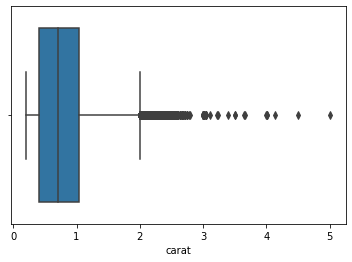

In [ ]:
# show carat feature
sns.boxplot(x=diamonds['carat'])

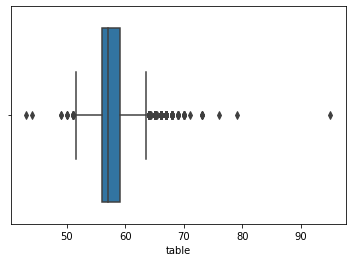

In [ ]:
# Show table feature
sns.boxplot(x=diamonds['table'])

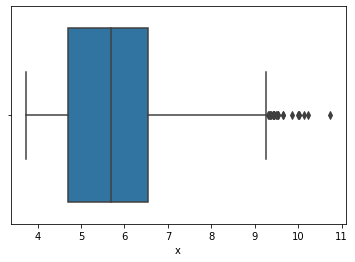

In [ ]:
# Show x feature
sns.boxplot(x=diamonds['x'])

In [ ]:
# Make Equation
Q1 = diamonds.quantile(0.25)
Q3 = diamonds.quantile(0.75)
IQR = Q3-Q1
diamonds = diamonds[~((diamonds<(Q1-1.5*IQR))|(diamonds>(Q3+1.5*IQR))).any(axis=1)]
    
# Check size after removing outliers
diamonds.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """


(47524, 10)

### *5. Exploratory Data Analysis - Univariate Analysis*

In [ ]:
# Dividing Categorical and Numerical Feature
numerical_features = ['price', 'carat', 'depth', 'table', 'x', 'y', 'z']
categorical_features = ['cut', 'color', 'clarity']

In [ ]:
# Create Count function
def countFeature(dataset: list, feature_type: list, index: int) -> None:
    plt.style.use('dark_background')
    feature = feature_type[index]
    count = dataset[feature].value_counts()
    percent = 100*dataset[feature].value_counts(normalize=True)
    df = pd.DataFrame({'sample count':count, 'percentage':percent.round(1)})
    print(df)
    count.plot(kind='bar', title=feature, color='#1f77b4');

           sample count  percentage
Ideal             20340        42.8
Premium           12115        25.5
Very Good         10994        23.1
Good               3745         7.9
Fair                330         0.7


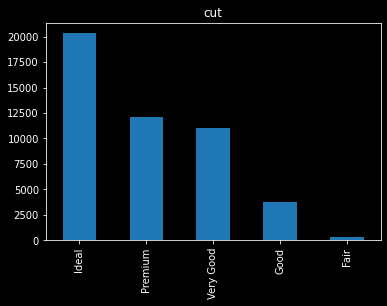

In [ ]:
# Cut feature
countFeature(diamonds, categorical_features, 0)

   sample count  percentage
G         10081        21.2
E          8910        18.7
F          8466        17.8
H          7176        15.1
D          6195        13.0
I          4462         9.4
J          2234         4.7


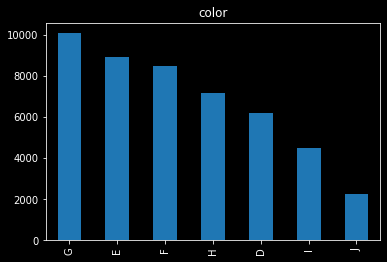

In [ ]:
# Cut Color
countFeature(diamonds, categorical_features, 1)

      sample count  percentage
SI1          11552        24.3
VS2          10928        23.0
SI2           7402        15.6
VS1           7373        15.5
VVS2          4683         9.9
VVS1          3463         7.3
IF            1650         3.5
I1             473         1.0


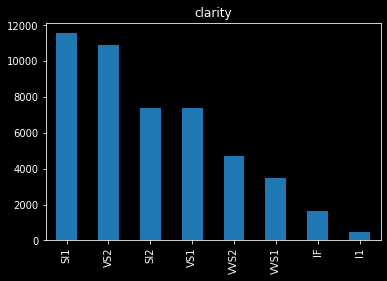

In [ ]:
# Clarity feature
countFeature(diamonds, categorical_features, 2)

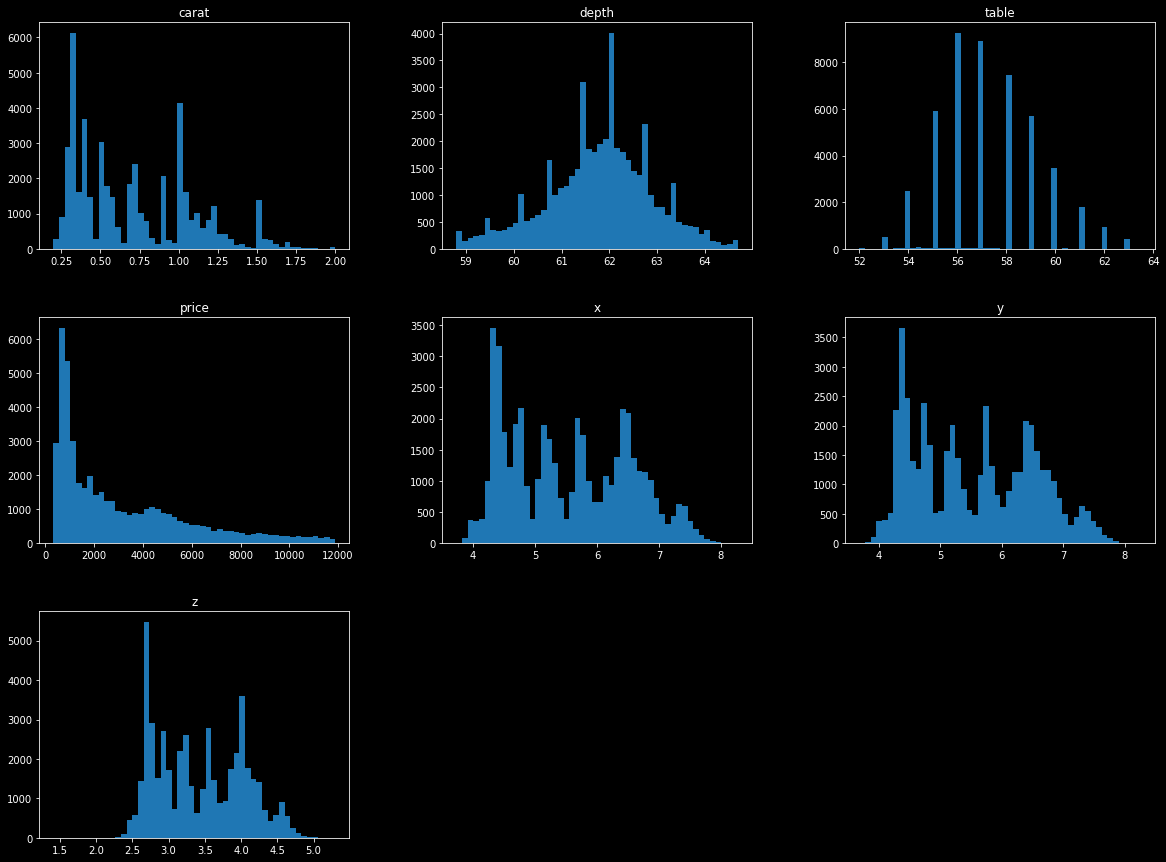

In [ ]:
# Numerical Feature
plt.style.use('dark_background')
diamonds.hist(bins=50, figsize=(20,15), color='#1f77b4', grid=False)
plt.show()

### *6. Exploratory Data Analysis - Multivariate Analysis*

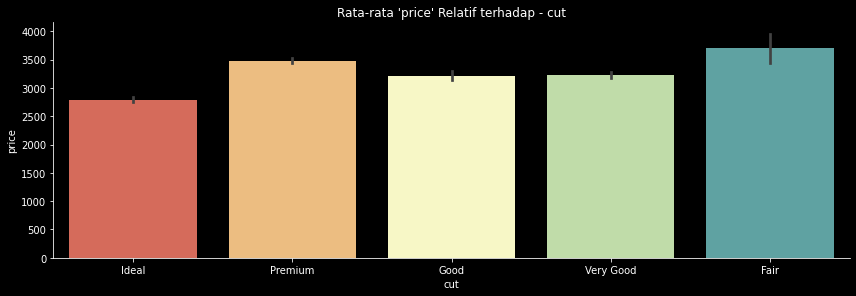

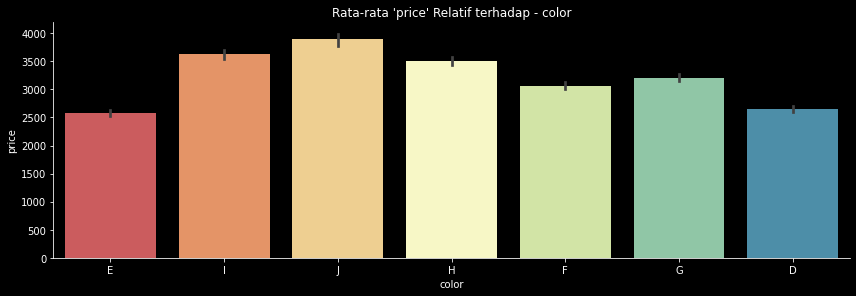

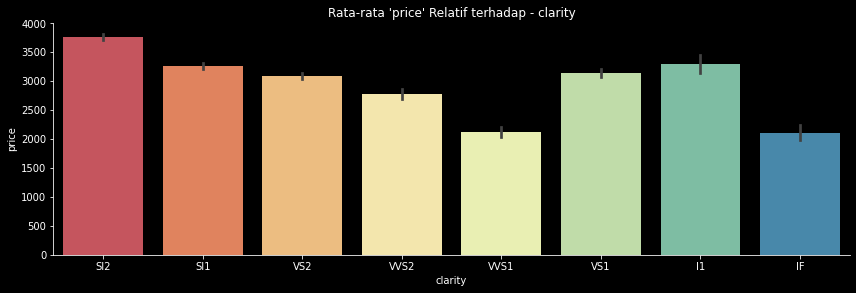

In [ ]:
# Categorical Feature
cat_features = diamonds.select_dtypes(include='object').columns.to_list()
    
for col in cat_features:
    sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=diamonds, palette="Spectral")
    plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

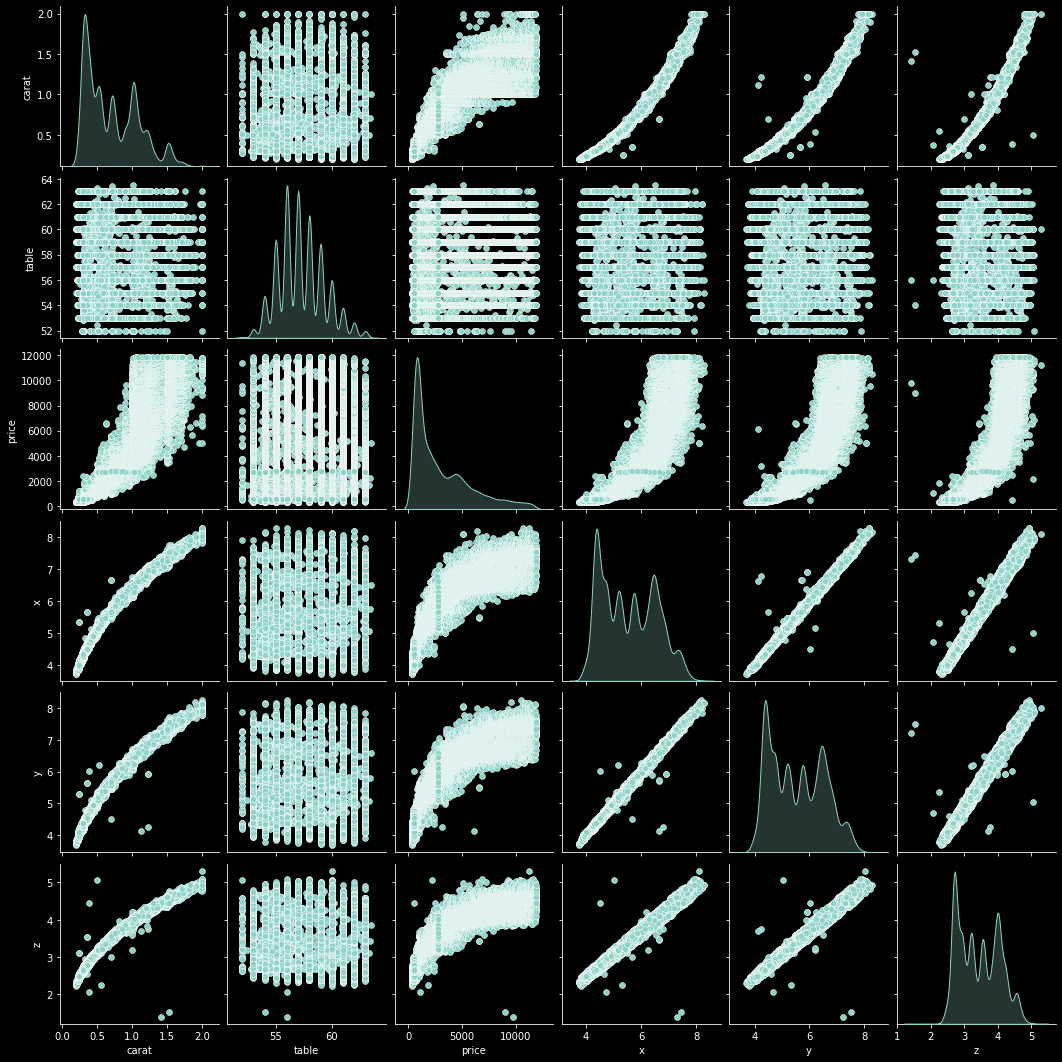

In [ ]:
# Numerical Feature
sns.pairplot(diamonds, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix In Numerical Feature ')

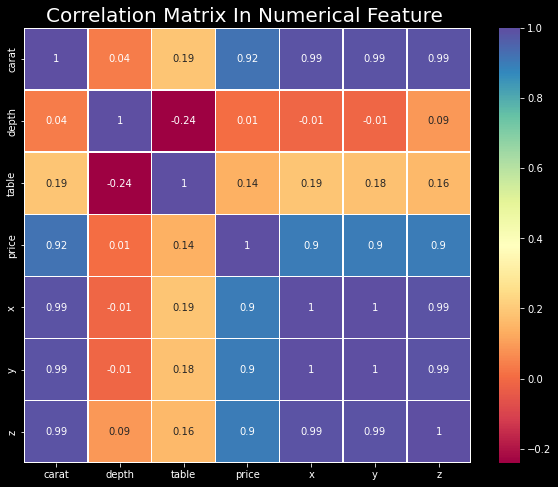

In [ ]:
# Plot in Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = diamonds.corr().round(2)
    
sns.heatmap(data=correlation_matrix, annot=True, cmap='Spectral', linewidths=0.5, )
plt.title("Correlation Matrix In Numerical Feature ", size=20)

In [ ]:
# Droping uncorrelate feature
diamonds.drop(['depth'], inplace=True, axis=1)
diamonds.head()

,carat,cut,color,clarity,table,price,x,y,z
0,0.23,Ideal,E,SI2,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,57.0,336,3.94,3.96,2.48


## **Data Preprocessing**

### *1. One-Hot Encoding*

In [ ]:
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['cut'], prefix='cut')],axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['color'], prefix='color')],axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['clarity'], prefix='clarity')],axis=1)
diamonds.drop(['cut','color','clarity'], axis=1, inplace=True)
diamonds.head()

,carat,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,55.0,326,3.95,3.98,2.43,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,61.0,326,3.89,3.84,2.31,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0.29,58.0,334,4.20,4.23,2.63,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0.31,58.0,335,4.34,4.35,2.75,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
5,0.24,57.0,336,3.94,3.96,2.48,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


### *2. Dimension Reduction*

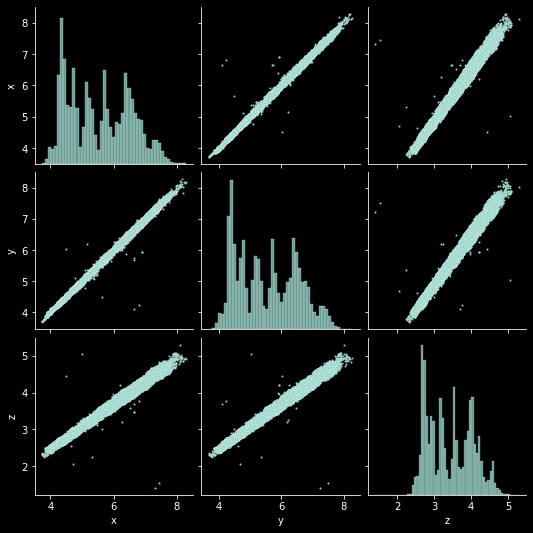

In [ ]:
sns.pairplot(diamonds[['x','y','z']], plot_kws={"s": 3});

In [ ]:
pca = PCA(n_components=3, random_state=123)
princ_comp = pca.fit_transform(diamonds[['x','y','z']])

In [ ]:
pca.explained_variance_ratio_.round(3)

array([0.998, 0.002, 0.001])

In [ ]:
pca = PCA(n_components=1, random_state=123)
pca.fit(diamonds[['x','y','z']])
diamonds['dimension'] = pca.transform(diamonds.loc[:, ('x','y','z')]).flatten()
diamonds.drop(['x','y','z'], axis=1, inplace=True)

In [ ]:
diamonds

,carat,table,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,dimension
0,0.23,55.0,326,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,-2.452585
1,0.21,61.0,326,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,-2.630066
3,0.29,58.0,334,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,-2.048530
4,0.31,58.0,335,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,-1.831975
5,0.24,57.0,336,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,-2.451982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,57.0,2757,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0.295534
53936,0.72,55.0,2757,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0.294127
53937,0.70,60.0,2757,0,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0.209390
53938,0.86,58.0,2757,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0.884149


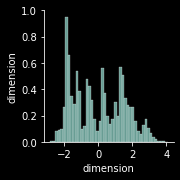

In [ ]:
sns.pairplot(diamonds[['dimension']], plot_kws={"s": 3});

### *3. Split Dataset*

In [ ]:
X = diamonds.drop(["price"],axis =1)
y = diamonds["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 47524
Total # of sample in train dataset: 42771
Total # of sample in test dataset: 4753


### *4. Standarization*

In [ ]:
numerical_features = ['carat', 'table', 'dimension']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,carat,table,dimension
536,-0.026226,0.864091,0.143464
21293,1.348407,1.359644,1.353588
45577,-0.511390,-0.622566,-0.372761
37379,-0.834833,-0.622566,-0.905790
38240,-0.861787,-0.622566,-0.813165


In [ ]:
X_train[numerical_features].describe().round(4)

,carat,table,dimension
count,42771.0000,42771.0000,42771.0000
mean,0.0000,-0.0000,-0.0000
std,1.0000,1.0000,1.0000
min,-1.3739,-2.6048,-1.8867
25%,-0.8887,-0.6226,-0.9283
50%,-0.2688,-0.1270,-0.1063
75%,0.8093,0.8641,0.8847
max,3.4777,3.0941,2.6998


## **Model Development**

### *1. K-Nearest Neighbor*

In [ ]:
# Create result log
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                        columns=['KNN', 'RandomForest', 'Boosting'])

In [ ]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
    
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

In [ ]:
models

,KNN,RandomForest,Boosting,knn
train_mse,NaN,NaN,NaN,203762.502115
test_mse,NaN,NaN,NaN,NaN


### *2. Random Forest*

In [ ]:
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)          

In [ ]:
models

,KNN,RandomForest,Boosting,knn
train_mse,NaN,52287.365706,NaN,203762.502115
test_mse,NaN,NaN,NaN,NaN


### *3. Boosting Algorithm*

In [ ]:
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

In [ ]:
models

,KNN,RandomForest,Boosting,knn
train_mse,NaN,52287.365706,904838.012908,203762.502115
test_mse,NaN,NaN,NaN,NaN


## **Model Evaluation**

In [ ]:
# Standarize Test Set
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [ ]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
 
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
mse

,train,test
KNN,203.762502,239.539894
RF,52.287366,130.788418
Boosting,904.838013,846.212966


## **Model Visualization**

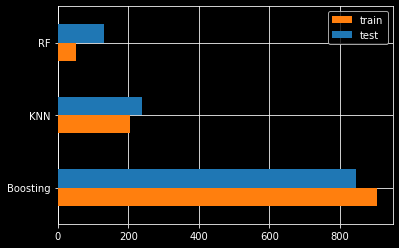

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3, color=['#ff7f0e', '#1f77b4'])
ax.grid(zorder=0)

## **Model Testing**

In [ ]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
    
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
35096,886,923.2,884.2,788.1
